## Task A: Gender Classification (Binary Classification)

## 1. Data Loading and Preparation
Images are loaded from specified training and validation directories. ImageDataGenerator is used for data augmentation during training to improve model robustness. Class weights are computed to address potential class imbalance in the dataset.

In [ ]:

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import os

# Paths to your folders
train_dir = '/content/drive/MyDrive/Dataset/Task_A/train'
val_dir = '/content/drive/MyDrive/Dataset/Task_A/val'

# Image Parameters
img_height, img_width = 150, 150
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Handle Class Imbalance using Class Weights
labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr]
)

# Save Model
model.save('gender_classification_model.h5')


Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Class Weights: {0: np.float64(3.1782178217821784), 1: np.float64(0.5933456561922366)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6559 - loss: 1.1785 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 791s 13s/step - accuracy: 0.6557 - loss: 1.1757 - val_accuracy: 0.1872 - val_loss: 1.0132 - learning_rate: 1.0000e-04
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 393ms/step - accuracy: 0.6381 - loss: 0.6807 - val_accuracy: 0.2441 - val_loss: 0.9394 - learning_rate: 1.0000e-04
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 0.7405 - loss: 0.6075 - val_accuracy: 0.7820 - val_loss: 0.5017 - learning_rate: 1.0000e-04
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 424ms/step - accuracy: 0.7656 - loss: 0.5753 - val_accuracy: 0.7986 - val_loss: 0.6281 - learning_rate: 1.0000e-04
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 423ms/step - accuracy: 0.7348 - loss: 0.5518 - val_accuracy: 0.8081 - val_loss: 0.9005 - learning_rate: 1.0000e-04
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 389ms/step - accuracy: 0.6975 - loss: 0.5683 - val_accuracy: 0.8246 - val_loss: 0.6919 - learning_rate: 1.0000e-04
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 388ms/step - accuracy: 0.756

## This cell installs the keras_tuner library, which is used for hyperparameter tuning.

In [ ]:
!pip install keras_tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


## This cell loads the pre-trained VGG16 model from the tensorflow.keras.applications module. It uses weights from the 'imagenet' dataset and excludes the top classification layer (include_top=False). The input shape is set to match the image dimensions used in this notebook.

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## This cell builds a new sequential model on top of the pre-trained VGG16 base. It adds a Flatten layer to convert the output of the convolutional base into a 1D array, followed by a Dense layer with ReLU activation, a Dropout layer for regularization, and a final Dense layer with sigmoid activation for binary classification. The model summary is printed to show the layers and parameter counts

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Create a Sequential model
model = Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add new layers on top
model.add(Flatten())
model.add(Dense(256, activation='relu')) # Example dense layer
model.add(Dropout(0.5)) # Example dropout layer
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

## This cell freezes the weights of the layers in the pre-trained VGG16 base model. This is done to prevent their weights from being updated during the initial training phase, allowing only the newly added layers to be trained. The trainable status of the base model's layers is verified and the model summary is printed again to show the reduced number of trainable parameters.

In [ ]:
# Freeze the weights of the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Verify that the layers in the base_model are not trainable
print("Base model layers trainable status after freezing:")
for layer in base_model.layers[-5:]: # Print status for the last few layers
    print(f"{layer.name}: {layer.trainable}")

# Print the model summary again to observe the number of trainable parameters
model.summary()

Base model layers trainable status after freezing:
block4_pool: False
block5_conv1: False
block5_conv2: False
block5_conv3: False
block5_pool: False


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## This cell compiles the model with the Adam optimizer, binary crossentropy loss, and accuracy metric. It uses the learning rate obtained from hyperparameter tuning (assuming best_hps is defined in a previous cell). It also defines early stopping and reduce learning rate callbacks. The model is then trained for a smaller number of epochs with the frozen base layers and class weights to handle data imbalance.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model
# Use the learning rate from the best hyperparameters found during tuning
# best_hps and model are available from previous cells
model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks to prevent overfitting (same as before)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model with frozen base layers
# Use a smaller number of epochs for this initial training phase
# Include class weights to handle imbalance
history_frozen = model.fit(
    train_generator,
    epochs=10, # Initial training with frozen layers
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 522ms/step - accuracy: 0.5841 - loss: 0.6946 - val_accuracy: 0.8223 - val_loss: 0.4120 - learning_rate: 1.0000e-04
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 443ms/step - accuracy: 0.7783 - loss: 0.4915 - val_accuracy: 0.8673 - val_loss: 0.3379 - learning_rate: 1.0000e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 449ms/step - accuracy: 0.7655 - loss: 0.4859 - val_accuracy: 0.8957 - val_loss: 0.2648 - learning_rate: 1.0000e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 441ms/step - accuracy: 0.8588 - loss: 0.3896 - val_accuracy: 0.8720 - val_loss: 0.3051 - learning_rate: 1.0000e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 451ms/step - accuracy: 0.8434 - loss: 0.3594 - val_accuracy: 0.8815 - val_loss: 0.3116 - learning_rate: 1.0000e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 442ms/step - accuracy: 0.8278 - loss: 0.3996 - val_accuracy: 0.8886 - val_loss: 0.2764 - learning_rate: 1.0000e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 439ms/step - acc

## This cell unfreezes the last few convolutional layers of the VGG16 base model (block5_conv1, block5_conv2, and block5_conv3) for fine-tuning. Other layers in the base model remain frozen. The trainable status of the layers is verified. The entire model is then recompiled with a significantly lower learning rate to allow for fine-tuning of the unfrozen layers. Finally, the model is trained again for a smaller number of epochs with the unfrozen layers and class weights.

In [ ]:
# Unfreeze the last few layers of the base model for fine-tuning
# We will unfreeze the last convolutional block (block5_conv1, block5_conv2, block5_conv3)
print("Unfreezing the last convolutional block of the base model.")
for layer in base_model.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv3']:
        layer.trainable = True
    else:
        layer.trainable = False # Ensure other layers remain frozen

# Verify that the selected layers in the base_model are now trainable
print("Base model layers trainable status after unfreezing for fine-tuning:")
for layer in base_model.layers[-8:]: # Check the last few layers
    print(f"{layer.name}: {layer.trainable}")


# Recompile the entire model with a very low learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate') * 0.1), # Reduce learning rate for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary again to observe the number of trainable parameters
model.summary()

# Train the model again for fine-tuning
# Use a smaller number of epochs for fine-tuning
history_finetuned = model.fit(
    train_generator,
    epochs=10, # Smaller number of epochs for fine-tuning
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr]
)


Unfreezing the last convolutional block of the base model.
Base model layers trainable status after unfreezing for fine-tuning:
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: False


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 37s 502ms/step - accuracy: 0.8018 - loss: 0.4404 - val_accuracy: 0.8910 - val_loss: 0.2990 - learning_rate: 1.0000e-05
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 446ms/step - accuracy: 0.8461 - loss: 0.3412 - val_accuracy: 0.8791 - val_loss: 0.3202 - learning_rate: 1.0000e-05
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 454ms/step - accuracy: 0.8689 - loss: 0.2989 - val_accuracy: 0.8910 - val_loss: 0.2960 - learning_rate: 1.0000e-05
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 443ms/step - accuracy: 0.8904 - loss: 0.2658 - val_accuracy: 0.8673 - val_loss: 0.3603 - learning_rate: 1.0000e-05
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 440ms/step - accuracy: 0.8841 - loss: 0.2749 - val_accuracy: 0.9076 - val_loss: 0.2502 - learning_rate: 1.0000e-05
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.8947 - loss: 0.2453 - val_accuracy: 0.9218 - val_loss: 0.2434 - learning_rate: 1.0000e-05
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 435ms/step - acc

## This cell evaluates the performance of the trained model on the validation set. It generates a classification report, which includes precision, recall, and f1-score for each class, and a confusion matrix, which visualizes the number of correct and incorrect predictions for each class.

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step

Classification Report (Transfer Learning Model):
              precision    recall  f1-score   support

      female       0.18      0.19      0.19        79
        male       0.81      0.80      0.81       343

    accuracy                           0.69       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.69      0.69      0.69       422



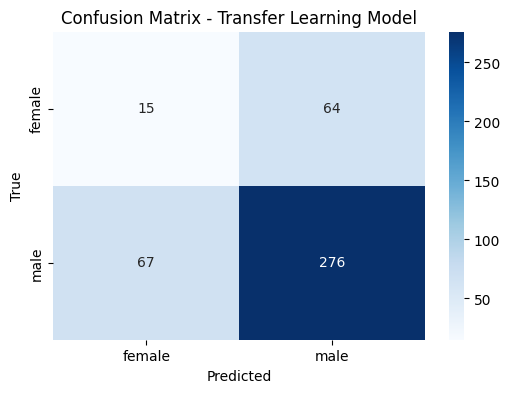

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true labels
val_generator.reset()
true_labels = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Predict probabilities
pred_probs = model.predict(val_generator, verbose=1)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

# Classification Report
print("\nClassification Report (Transfer Learning Model):")
print(classification_report(true_labels, pred_labels, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Transfer Learning Model')
plt.show()

## This cell demonstrates how to use the trained model to make a prediction on a new, unseen image. It loads the image, preprocesses it to the correct size and format, makes a prediction using the model, and then prints the predicted class and the confidence level of the prediction.

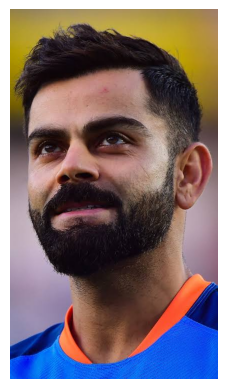

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Class: Male
Confidence: 99.45%


In [ ]:
# Path to your test image - replace with the actual path if needed
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = '/content/pic1.jpg'
# imshow(img_path) # Removed this line
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_height, img_width))  # Resize to training input size
img_array = image.img_to_array(img) / 255.0              # Normalize pixel values (0 to 1)
img_array = np.expand_dims(img_array, axis=0)            # Model expects batch dimension (1, img_height, img_width, 3)

# Predict
probability = model.predict(img_array)[0][0]  # Single probability for binary classification

# Map numeric output to class name
if probability >= 0.5:
    predicted_class = 'Male'
else:
    predicted_class = 'Female'

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {probability * 100:.2f}%")

## This cell saves the trained model

In [ ]:
# Save the trained model to Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the model in your Google Drive
save_path = '/content/drive/MyDrive/trained file/gender_classification_transfer_learning_model.keras' # You can change the filename

# Save the model
model.save(save_path)

print(f"Model saved successfully to: {save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully to: /content/drive/MyDrive/trained file/gender_classification_transfer_learning_model.keras
